In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.optimize

from datetime import datetime
import pytz

import trfp

central_time = pytz.timezone('US/Central')

matplotlib.rc('xtick', labelsize=10)     
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', titlesize=16)
matplotlib.rc('axes', labelsize=12)
plt.rcParams["font.family"] = "serif"
sns.set(style="darkgrid")

Welcome to JupyROOT 6.12/04


[0.07548529 0.10826882 0.11969726 0.11555142 0.11439144 0.11230711
 0.10419486 0.11605103 0.10973921 0.10844967 0.09170097 0.09078942
 0.11077957 0.12105016 0.08320731 0.07389013 0.09346556 0.09729632
 0.0956769  0.1048244  0.11038617 0.11815256 0.09684629 0.07776622
 0.07989279 0.10482423 0.1088448  0.1085095  0.08040258 0.08452919
 0.10321179 0.10958216 0.10308221 0.08267487 0.0965375  0.10692414
 0.11478759 0.105398   0.07978453 0.09291316 0.10800866 0.11525726
 0.11606805 0.11203048 0.11417371 0.09750858 0.08651019 0.09008353
 0.10164623 0.11324434 0.10072307 0.1058123  0.08274471 0.10344915
 0.10700723 0.089882   0.0927134  0.08190186 0.09340083 0.11293274
 0.09206809 0.10761889 0.08437916 0.09670745 0.10330767 0.10312356
 0.10829015 0.11648079 0.10730532 0.086549   0.09151195 0.1103954
 0.10164771 0.11593123 0.094924   0.07870113 0.09668202 0.09908813
 0.11083985 0.07365187 0.08178612 0.1066472  0.11547834 0.11688393
 0.10177238 0.10621651 0.10111093 0.10520285 0.10349853 0.08510

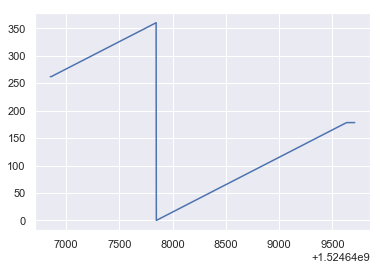

In [84]:
# check to see azimuthal extent of CCW trolley runs

corrected_df_1 = pd.read_hdf('60hr_trolley_runs_1.h5', key='run_3956_corrected_df')
corrected_df_2 = pd.read_hdf('60hr_trolley_runs_2.h5', key='run_3998_corrected_df')

hist_1, _ = np.histogram(corrected_df_1['tr_phi'],2880,(0,360))
hist_2, edges_2 = np.histogram(corrected_df_2['tr_phi'],2880,(0,360))

plt.plot(corrected_df_2['tr_phi'])

print np.diff(corrected_df_2['tr_phi'].iloc[9:120])

# print edges_2[0:-1][hist_2==0]

In [66]:
corrected_df_1 = pd.read_hdf('60hr_trolley_runs_1.h5', key='run_3956_corrected_df')
corrected_df_2 = pd.read_hdf('60hr_trolley_runs_2.h5', key='run_3996_corrected_df')

for run in np.arange(3997,3999):
    corrected_df_2 = corrected_df_2.append(pd.read_hdf('60hr_trolley_runs_2.h5', key='run_'+str(run)+'_corrected_df'))

hist_1, _ = np.histogram(corrected_df_1['tr_phi'],2880,(0,360))
hist_2, edges_2 = np.histogram(corrected_df_2['tr_phi'],2880,(0,360))
print np.sum(hist_1==0)
print np.sum(hist_2==0)

print edges_2[0:-1][hist_2==0]

0
0
[]


In [2]:
station_phi = trfp.STATION_BARCODE_PHI
station_edges = trfp.STATION_BARCODE_EDGES

corrected_df_1 = pd.read_hdf('60hr_trolley_runs_1.h5', key='run_3956_corrected_df')
tr_baseline_1, fp_baseline_1, baseline_time_1, summed_azimuth_1, _ = trfp.trolley_run_station_average(corrected_df_1)

corrected_df_2 = pd.read_hdf('60hr_trolley_runs_2.h5', key='run_3997_corrected_df')
tr_baseline_2, fp_baseline_2, baseline_time_2, summed_azimuth_2, _ = trfp.trolley_run_station_average(corrected_df_2)

# load all fixed probe runs moment_df into one big moment_df (runs 3959--3994)
fp_moment_df = pd.read_hdf('60hr_fixed_probe_runs.h5', key='run_3959_moment_df')
pts = fp_moment_df.shape[0]

# load all the trolley runs corrected_df into on big file (to show window of 60hr set) ()
tr_corrected_df = pd.read_hdf('60hr_trolley_runs_1.h5', key='run_3955_corrected_df')
for run in np.arange(3956, 3959):
    temp_df = pd.read_hdf('60hr_trolley_runs_1.h5', key='run_'+str(run)+'_corrected_df')
    pts = pts + temp_df.shape[0]
    print '\rAppending run ' + str(run) + '.',
    tr_corrected_df = tr_corrected_df.append(temp_df)
for run in np.arange(3995, 3999):
    temp_df = pd.read_hdf('60hr_trolley_runs_2.h5', key='run_'+str(run)+'_corrected_df')
    pts = pts + temp_df.shape[0]
    print '\rAppending run ' + str(run) + '.',
    tr_corrected_df = tr_corrected_df.append(temp_df)

for run in np.arange(3959, 3995):
    temp_df = pd.read_hdf('60hr_fixed_probe_runs.h5', key='run_'+str(run)+'_moment_df')
    pts = pts + temp_df.shape[0]
    print '\rAppending run ' + str(run) + '.',
    fp_moment_df = fp_moment_df.append(temp_df)
    
print '\rDone appending runs.',

Done appending runs.                                   


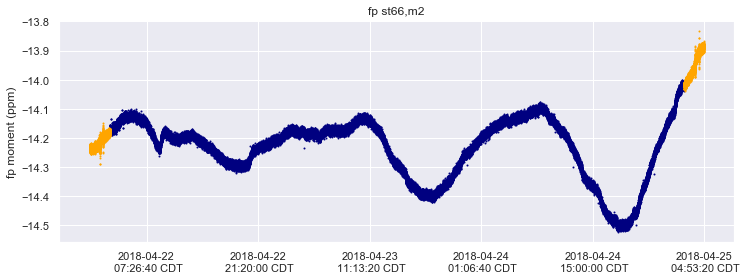

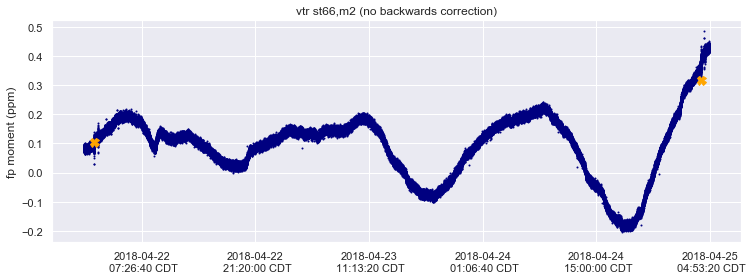

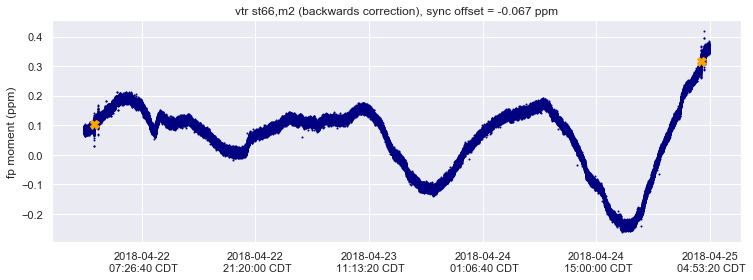

In [3]:
st = 66
m = 2
stm = 'st'+str(st)+',m'+str(m)

fig1, ax1 = plt.subplots(1,1)
plt.sca(ax1)
plt.plot(fp_moment_df.index.values, fp_moment_df[stm]/61.79, '.', color='navy', markersize=2)
plt.plot(tr_corrected_df.index.values, tr_corrected_df[stm]/61.79, '.', color='orange', markersize=2)
xticks = ax1.get_xticks()
ax1.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                     for tm in xticks], rotation=0)
ax1.set_ylabel('fp moment (ppm)')
ax1.set_title('fp '+stm)
fig1.tight_layout()
fig1.set_size_inches(12,4)

# apply baseline correction to chosen station

vtr_stm = (fp_moment_df[stm] - fp_baseline_1[st, m-1]) + tr_baseline_1[st, m-1]
vtr_stm_tr_run = (tr_corrected_df[stm] - fp_baseline_1[st, m-1]) + tr_baseline_1[st, m-1]

fig2, ax2 = plt.subplots(1,1)
plt.sca(ax2)
plt.plot(fp_moment_df.index.values, vtr_stm/61.79, '.', color='navy', markersize=2)
plt.plot(tr_corrected_df.index.values, vtr_stm_tr_run/61.79, '.', color='navy', markersize=2)
plt.plot(baseline_time_1[st], tr_baseline_1[st, m-1]/61.79, 'X', color='orange', markersize=9)
plt.plot(baseline_time_2[st], tr_baseline_2[st, m-1]/61.79, 'X', color='orange', markersize=9)
xticks = ax2.get_xticks()
ax2.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                     for tm in xticks], rotation=0)
ax2.set_ylabel('fp moment (ppm)')
ax2.set_title('vtr '+stm+' (no backwards correction)')
fig2.tight_layout()
fig2.set_size_inches(12,4)

# apply backwards correction to chosen station

def backwards_correction(time):
    c1 = tr_baseline_1[st, m-1] - fp_baseline_1[st, m-1]
    c2 = tr_baseline_2[st, m-1] - fp_baseline_2[st, m-1]
    t1 = baseline_time_1[st]
    t2 = baseline_time_2[st]
    return (c2-c1)/(t2-t1)*(time-t1) + c1

vtr_stm = fp_moment_df[stm] + backwards_correction(fp_moment_df.index.values)
vtr_stm_tr_run = tr_corrected_df[stm] + backwards_correction(tr_corrected_df.index.values)
glitch = backwards_correction(baseline_time_2[st]) - backwards_correction(baseline_time_1[st])

fig3, ax3 = plt.subplots(1,1)
plt.sca(ax3)
plt.plot(fp_moment_df.index.values, vtr_stm/61.79, '.', color='navy', markersize=2)
plt.plot(tr_corrected_df.index.values, vtr_stm_tr_run/61.79, '.', color='navy', markersize=2)
plt.plot(baseline_time_1[st], tr_baseline_1[st, m-1]/61.79, 'X', color='orange', markersize=9)
plt.plot(baseline_time_2[st], tr_baseline_2[st, m-1]/61.79, 'X', color='orange', markersize=9)
xticks = ax3.get_xticks()
ax3.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                     for tm in xticks], rotation=0)
ax3.set_ylabel('fp moment (ppm)')
ax3.set_title('vtr '+stm+' (backwards correction), sync offset = %.3f ppm'%(glitch/61.79))
fig3.tight_layout()
fig3.set_size_inches(12,4)

In [ ]:
# analyze glitches

m=1

def backwards_correction_2(time):
    c1 = tr_baseline_1[:, m-1] - fp_baseline_1[:, m-1]
    c2 = tr_baseline_2[:, m-1] - fp_baseline_2[:, m-1]
    t1 = baseline_time_1[st]
    t2 = baseline_time_2[st]
    return (c2-c1)/(t2-t1)*(time-t1) + c1

glitches = backwards_correction_2(baseline_time_2) - backwards_correction_2(baseline_time_1)

glitch_hist_fig, glitch_hist_ax = plt.subplots(1,1)
plt.sca(glitch_hist_ax)
plt.hist(glitches/61.79, 25)
glitch_hist_ax.set_title('Sync Offset Histogram, m%.0f'%m)
glitch_hist_ax.set_xlabel('sync offset (ppm)')
glitch_hist_fig.tight_layout()
glitch_hist_fig.set_size_inches(12,6)

# check what happened to the normal 6-pole in this time
sextupole_fig, sextupole_ax = plt.subplots(1,1)
plt.sca(sextupole_ax)
plt.hist((tr_baseline_2[:,4] - tr_baseline_1[:,4])/61.79, 25)
sextupole_ax.set_title('Normal Sextupole Offset Histogram')
sextupole_ax.set_xlabel('n sextupole offset (ppm)')
sextupole_fig.tight_layout()
sextupole_fig.set_size_inches(12,6)

In [ ]:
m = 1
trolley_moment = 'tr,m'+str(m)

fig2, ax2 = plt.subplots(2,2)

plt.sca(ax2[0,0])
plt.plot(corrected_df_1['tr_phi'],corrected_df_1[trolley_moment]/61.79, '.', color='navy')
plt.plot(station_phi, tr_baseline_1[:,m-1]/61.79, '.', color='orange', markersize=6)
ax2[0,0].set_xlabel('phi (deg)')
ax2[0,0].set_ylabel('field moment (ppm)')
ax2[0,0].set_title('Trolley Baseline')
plt.sca(ax2[1,0])
plt.plot(station_phi, fp_baseline_1[:,m-1]/61.79, '.', color='orange', markersize=6)
ax2[1,0].set_xlabel('phi (deg)')
ax2[1,0].set_ylabel('field moment (ppm)')
ax2[1,0].set_title('Fixed Probe Baseline')

plt.sca(ax2[0,1])
plt.plot(corrected_df_2['tr_phi'],corrected_df_2[trolley_moment]/61.79, '.', color='navy')
plt.plot(station_phi, tr_baseline_2[:,m-1]/61.79, '.', color='orange', markersize=6)
ax2[0,1].set_xlabel('phi (deg)')
ax2[0,1].set_ylabel('field moment (ppm)')
ax2[0,1].set_title('Trolley Baseline')
plt.sca(ax2[1,1])
plt.plot(station_phi, fp_baseline_2[:,m-1]/61.79, '.', color='orange', markersize=6)
ax2[1,1].set_xlabel('phi (deg)')
ax2[1,1].set_ylabel('field moment (ppm)')
ax2[1,1].set_title('Fixed Probe Baseline')

fig2.tight_layout()
fig2.set_size_inches(12,6)


fig5, ax5 = plt.subplots(1,1)
plt.sca(ax5)
plt.plot(station_phi, tr_baseline_2[:,m-1]/61.79 - tr_baseline_1[:,m-1]/61.79, '.', color='navy', markersize=6)
plt.plot(station_phi, fp_baseline_2[:,m-1]/61.79 - fp_baseline_1[:,m-1]/61.79, '.', color='orange', markersize=6)
ax5.set_xlabel('phi (deg)')
ax5.set_ylabel(r'$\Delta$ field moment (ppm)')
ax5.set_title(r'$\Delta$ Baseline')
fig5.tight_layout()
fig5.set_size_inches(12,4)


fig6, ax6 = plt.subplots(1,1)
plt.sca(ax6)
plt.plot(fp_baseline_2[:,m-1]/61.79 - fp_baseline_1[:,m-1]/61.79,
         tr_baseline_2[:,m-1]/61.79 - tr_baseline_1[:,m-1]/61.79, '.', color='navy', markersize=6)
plt.plot(np.arange(-10,10), np.arange(-10,10), ':', color='black')
ax6.set_xlabel(r'$\Delta$ fp field moment (ppm)')
ax6.set_ylabel(r'$\Delta$ tr field moment (ppm)')
ax6.set_title(r'$\Delta$ Baseline correlation')
fig6.tight_layout()
fig6.set_size_inches(12,4)

In [4]:
# calculate azimuthal averages as a function of time

# first thing to do is to create a virtual trolley measurement dataframe
vtr_df = fp_moment_df.copy()
# NOTE: FOR NOW THIS ONLY LOOKS AT M1--M3, STILL NEEDS UPDATED JACOBIAN
for st in np.arange(72):
    for m in np.arange(3):
        def backwards_correction(time):
            c1 = tr_baseline_1[st, m] - fp_baseline_1[st, m]
            c2 = tr_baseline_2[st, m] - fp_baseline_2[st, m]
            t1 = baseline_time_1[st]
            t2 = baseline_time_2[st]
            return (c2-c1)/(t2-t1)*(time-t1) + c1
        
        print '\rSyncing st'+str(st)+', m'+str(m+1),        
        
        stm = 'st'+str(st)+',m'+str(m+1)
        vtr_df[stm] = vtr_df[stm] + backwards_correction(fp_moment_df.index.values)

Syncing st71, m3 


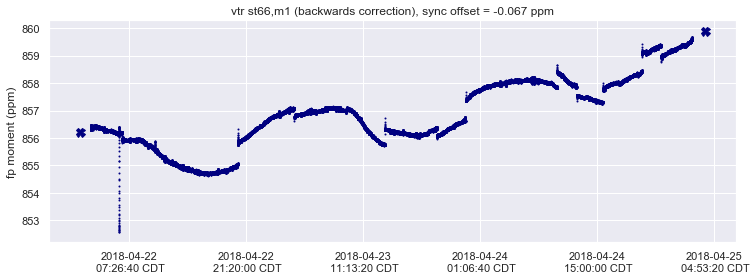

In [5]:
st = 66
m = 1
stm = 'st'+str(st)+',m'+str(m)

fig10, ax10 = plt.subplots(1,1)
plt.sca(ax10)
plt.plot(fp_moment_df.index.values, vtr_df[stm]/61.79, '.', color='navy', markersize=2)
plt.plot(baseline_time_1[st], tr_baseline_1[st, m-1]/61.79, 'X', color='navy', markersize=9)
plt.plot(baseline_time_2[st], tr_baseline_2[st, m-1]/61.79, 'X', color='navy', markersize=9)
xticks = ax10.get_xticks()
ax10.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                     for tm in xticks], rotation=0)
ax10.set_ylabel('fp moment (ppm)')
ax10.set_title('vtr '+stm+' (backwards correction), sync offset = %.3f ppm'%(glitch/61.79))
fig10.tight_layout()
fig10.set_size_inches(12,4)

In [36]:
# for each time, fit to a Fourier series
# this might take a long long time, if so average first. Should reduce time by a factor of 10.

def fourier_series_2(phi, A0, A1, B1, A2, B2):
    return (A0
            + A1*np.sin(np.pi*phi/180) + B1*np.cos(np.pi*phi/180)
            + A2*np.sin(2*np.pi*phi/180) + B2*np.cos(2*np.pi*phi/180)
           )

m = 1
stm_list = ['st'+str(st)+',m'+str(m) for st in np.arange(72)]

m1_azi_avg = np.empty(vtr_df.shape[0])
m1_azi_avg[:] = np.nan

for ii in np.arange(100):
    coeffs, _ = scipy.optimize.curve_fit(fourier_series_2, station_phi, vtr_df[stm_list].iloc[ii])
    m1_azi_avg[ii] = coeffs[0]
    print '\r' + str(ii) + ' of ' + str(vtr_df.shape[0]) + '.',



99 of 132008.                        


In [26]:
m1_azi_avg_2 = np.empty(vtr_df.shape[0])
m1_azi_avg_2[:] = np.nan

weight = summed_azimuth_1+summed_azimuth_2
total_weight = np.sum(summed_azimuth_1 + summed_azimuth_2)

for ii in np.arange(100):
    m1_azi_avg_2[ii] = np.sum(vtr_df[stm_list].iloc[ii]*weight)/total_weight
    print '\r' + str(ii) + ' of ' + str(vtr_df.shape[0]) + '.',


999 of 132008.                      


[-0.16196325 -0.16189644 -0.16152583 -0.16230419 -0.16113792 -0.16281389
 -0.16406708 -0.16279181 -0.16198243 -0.16080394]


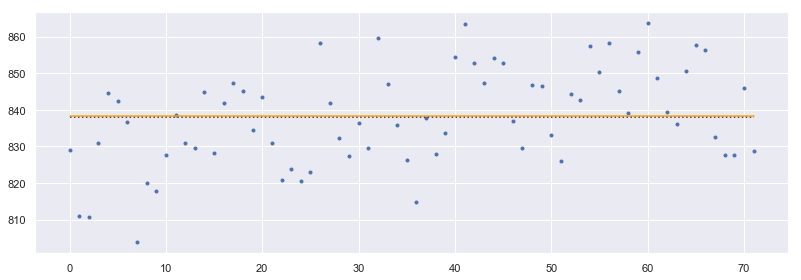

In [37]:
diffs = m1_azi_avg - m1_azi_avg_2
print diffs[0:10]/61.79

fourier_fit = np.empty(72)
fourier_fit[:] = m1_azi_avg[0]/61.79
weighted_fit = np.empty(72)
weighted_fit[:] = m1_azi_avg_2[0]/61.79

fig, ax = plt.subplots(1,1)
plt.sca(ax)
plt.plot(vtr_df[stm_list].iloc[0].values/61.79, '.')
plt.plot(fourier_fit, ':', color='navy')
plt.plot(weighted_fit, '-', color='orange')

fig.tight_layout()
fig.set_size_inches(12,4)

In [ ]:
corrected_df = pd.read_hdf('60hr_trolley_runs_1.h5', key='run_3956_corrected_df')
tr_baseline_1, fp_baseline_1, baseline_time_1, summed_azimuth_1, _ = trfp.trolley_run_station_average(corrected_df)

m = 1
trolley_moment = 'tr,m'+str(m)

fig2, ax2 = plt.subplots(2,1)
plt.sca(ax2[0])
plt.plot(corrected_df['tr_phi'],corrected_df[trolley_moment]/61.79, '.', color='navy')
plt.plot(station_phi, tr_baseline_1[:,m-1]/61.79, '.', color='orange', markersize=12)
ax2[0].set_xlabel('phi (deg)')
ax2[0].set_ylabel('field moment (ppm)')
ax2[0].set_title('Trolley Baseline')
plt.sca(ax2[1])
plt.plot(station_phi, fp_baseline_1[:,m-1]/61.79, '.', color='orange', markersize=12)
ax2[1].set_xlabel('phi (deg)')
ax2[1].set_ylabel('field moment (ppm)')
ax2[1].set_title('Fixed Probe Baseline')

fig2.tight_layout()
fig2.set_size_inches(12,6)

print trolley_moment+':'
baseline_mean = sum(summed_azimuth_1*tr_baseline_1[:,m-1])/sum(summed_azimuth_1)
print '\tWeighted average of all station-trolley baselines with a posteri station extent: %0.4f'%(baseline_mean/61.79)

corrected_df = pd.read_hdf('60hr_trolley_runs_1.h5', key='run_3957_corrected_df')
tr_baseline_2, fp_baseline_2, baseline_time_2, summed_azimuth_2, _ = trfp.trolley_run_station_average(corrected_df)

m = 1
trolley_moment = 'tr,m'+str(m)

fig3, ax3 = plt.subplots(2,1)
plt.sca(ax3[0])
plt.plot(corrected_df['tr_phi'],corrected_df[trolley_moment]/61.79, '.', color='navy')
plt.plot(station_phi, tr_baseline_2[:,m-1]/61.79, '.', color='orange', markersize=12)
ax3[0].set_xlabel('phi (deg)')
ax3[0].set_ylabel('field moment (ppm)')
ax3[0].set_title('Trolley Baseline')
plt.sca(ax3[1])
plt.plot(station_phi, fp_baseline_2[:,m-1]/61.79, '.', color='orange', markersize=12)
ax3[1].set_xlabel('phi (deg)')
ax3[1].set_ylabel('field moment (ppm)')
ax3[1].set_title('Fixed Probe Baseline')

fig3.tight_layout()
fig3.set_size_inches(12,6)

print trolley_moment+':'
baseline_mean = sum(summed_azimuth_2*tr_baseline_2[:,m-1])/sum(summed_azimuth_2)
print '\tWeighted average of all station-trolley baselines with a posteri station extent: %0.4f'%(baseline_mean/61.79)

fig4, ax4 = plt.subplots(1,1)
plt.sca(ax4)
plt.plot((tr_baseline_1[:,1]-tr_baseline_2[:,1])/61.79, '.', color = 'navy', label='Tr Baseline')
plt.plot((fp_baseline_1[:,1]-fp_baseline_2[:,1])/61.79, '.', color = 'orange', label='Fp Baseline')
ax4.set_xlabel('phi (deg)')
ax4.set_ylabel(r'$\Delta$ field moment (ppm)')
ax4.set_title('CCW minus CW run baselines')
ax4.legend()
fig4.tight_layout()
fig4.set_size_inches(12,6)

In [ ]:
print 5.17824393e+04/61.79

In [ ]:
print vtr_df.shape